In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from impyute.imputation.cs import mice
%matplotlib inline
df = pd.read_csv('train.csv')

df = df.drop(['number_of_dependences (male)','number_of_dependences (female)'],axis=1)
df['age'] = 2020 - df['age']
df.drop_duplicates(inplace=True)
    # df = df.fillna(df.mean())
df['achievement_target_3'] = df['achievement_target_3'].replace('not_reached','not reached')
df['achievement_target_2'] = df['achievement_target_2'].replace('Pencapaian < 50%','achiev_< 50%')
df['achievement_target_2'] = df['achievement_target_2'].replace("Pencapaian 50%-100%",'achiev_50%-100%')
df['achievement_target_2'] = df['achievement_target_2'].replace("Pencapaian 100%-150%",'achiev_100%-150%')
df['achievement_target_2'] = df['achievement_target_2'].replace("Pencapaian > 1.5",'achiev_> 1.5')
df['achievement_target_1'] = df['achievement_target_1'].replace('Pencapaian < 50%','achiev_< 50%')
df['achievement_target_1'] = df['achievement_target_1'].replace("Pencapaian 50%-100%",'achiev_50%-100%')
df['achievement_target_1'] = df['achievement_target_1'].replace("Pencapaian 100%-150%",'achiev_100%-150%')
df['achievement_target_1'] = df['achievement_target_1'].replace("Pencapaian > 1.5",'achiev_> 1.5')


ModuleNotFoundError: No module named 'impyute'

In [88]:
100 * df.isnull().sum()/len(df)

job_level                                 0.000000
job_duration_in_current_job_level         0.000000
person_level                              0.000000
job_duration_in_current_person_level      0.000000
job_duration_in_current_branch            0.000000
Employee_type                             0.054840
Employee_status                           0.000000
gender                                    0.000000
age                                       0.000000
marital_status_maried(Y/N)                0.000000
number_of_dependences                     0.000000
Education_level                          16.488438
GPA                                      16.008592
year_graduated                           16.008592
job_duration_as_permanent_worker          9.277031
job_duration_from_training                0.000000
branch_rotation                           0.000000
job_rotation                              0.000000
assign_of_otherposition                   0.000000
annual leave                   

<AxesSubplot:xlabel='achievement_target_1', ylabel='count'>

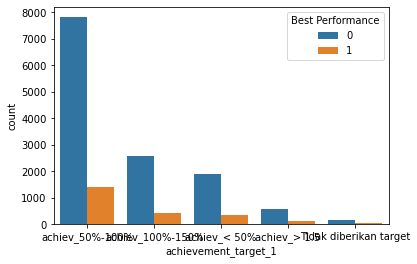

In [43]:
sns.countplot(x='achievement_target_1',data=df,hue='Best Performance')

<AxesSubplot:xlabel='achievement_target_2', ylabel='count'>

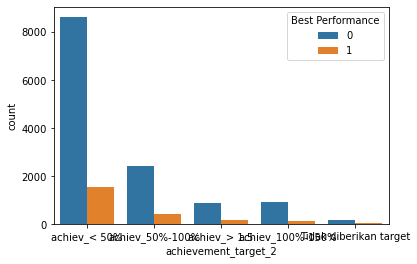

In [42]:
sns.countplot(x='achievement_target_2',data=df,hue='Best Performance')

<AxesSubplot:xlabel='achievement_target_3', ylabel='count'>

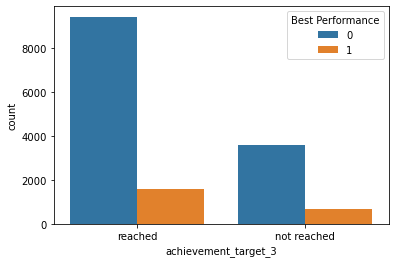

In [37]:
sns.countplot(x='achievement_target_3',data=df,hue='Best Performance')

In [38]:
ed_nol = df[df['Best Performance']==0].groupby('achievement_target_3').count()['Best Performance']

In [39]:
ed_satu = df[df['Best Performance']==1].groupby('achievement_target_3').count()['Best Performance']

In [41]:
ed_satu/(ed_nol+ed_satu)

achievement_target_3
not reached    0.162357
reached        0.143741
Name: Best Performance, dtype: float64

In [3]:
df.drop(['achievement_target_1','achievement_target_2','achievement_target_3'],axis=1)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,56,Y,...,30,9,7,0,8,0,0,68.850000,72.53,0.0
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,41,Y,...,16,7,7,9,3,0,0,94.810000,101.13,3.0
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,40,Y,...,15,9,9,0,6,0,0,72.820000,71.30,0.0
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,36,Y,...,8,5,5,0,3,0,0,86.890000,90.09,2.0
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,36,Y,...,7,4,6,11,2,1,1,95.170000,100.72,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,34,Y,...,5,2,2,0,2,0,0,71.776667,75.53,0.0
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,29,N,...,1,1,1,0,0,0,0,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,37,Y,...,7,5,4,0,3,2,0,108.856667,111.65,3.0
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,32,Y,...,6,5,4,0,13,0,0,76.366667,79.65,0.0


In [4]:
df = df.drop(['achievement_target_1','achievement_target_2','achievement_target_3'],axis=1)
100 * df.isnull().sum()/len(df)

job_level                                 0.000000
job_duration_in_current_job_level         0.000000
person_level                              0.000000
job_duration_in_current_person_level      0.000000
job_duration_in_current_branch            0.000000
Employee_type                             0.000000
Employee_status                           0.000000
gender                                    0.000000
age                                       0.000000
marital_status_maried(Y/N)                0.000000
number_of_dependences                     0.000000
Education_level                          16.488340
GPA                                      16.008230
year_graduated                           16.008230
job_duration_as_permanent_worker          9.282122
job_duration_from_training                0.000000
branch_rotation                           0.000000
job_rotation                              0.000000
assign_of_otherposition                   0.000000
annual leave                   

<AxesSubplot:>

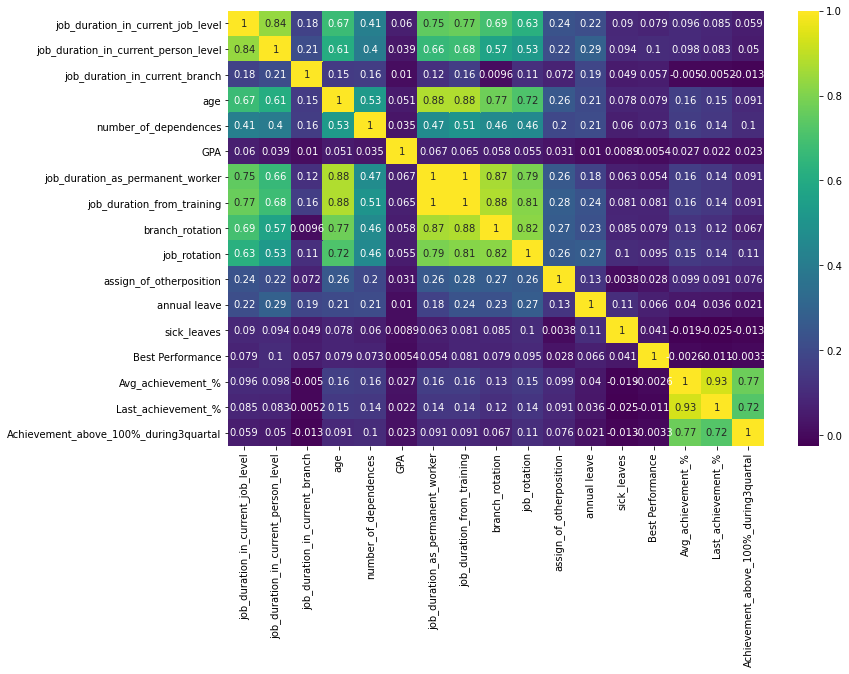

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21870 entries, 0 to 22004
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              21870 non-null  object 
 1   job_duration_in_current_job_level      21870 non-null  float64
 2   person_level                           21870 non-null  object 
 3   job_duration_in_current_person_level   21870 non-null  float64
 4   job_duration_in_current_branch         21870 non-null  float64
 5   Employee_type                          21870 non-null  object 
 6   Employee_status                        21870 non-null  object 
 7   gender                                 21870 non-null  object 
 8   age                                    21870 non-null  int64  
 9   marital_status_maried(Y/N)             21870 non-null  object 
 10  number_of_dependences                  21870 non-null  int64  
 11  Ed

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
Education_level                             0
GPA                                      3501
year_graduated                           3501
job_duration_as_permanent_worker         2030
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                                 0
Best Performance                  

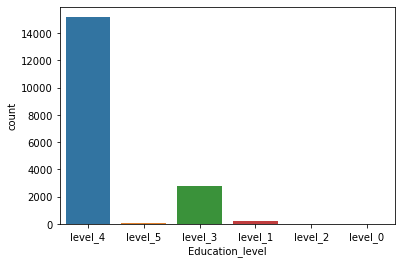

In [13]:
#bisa diisi dengan most frequent
#karena sekarang rata-rata orang masuk kerja minimal S1
sns.countplot(x='Education_level',data=df)
df['Education_level'] = df['Education_level'].fillna(df['Education_level'].mode().iloc[0])
df.isnull().sum()

In [35]:
df = df.drop('Achievement_above_100%_during3quartal',axis=1)

KeyError: "['Achievement_above_100%_during3quartal'] not found in axis"

In [28]:
a_best = df[df['Best Performance']==1].groupby('Achievement_above_100%_during3quartal').count()['Best Performance']

In [29]:
a_not_best = df[df['Best Performance']==0].groupby('Achievement_above_100%_during3quartal').count()['Best Performance']

In [30]:
#bisa didrop karena rationya tidak beda jauh
a_best/(a_best+a_not_best)

Achievement_above_100%_during3quartal
0.0    0.151353
1.0    0.130435
2.0    0.157551
3.0    0.147519
Name: Best Performance, dtype: float64

In [126]:
df=df[df['Employee_type'].notna()]
df = df.drop(['achievement_target_1','achievement_target_2','achievement_target_3','Achievement_above_100%_during3quartal'],axis=1)
df.isnull().sum()

job_level                                  0
job_duration_in_current_job_level          0
person_level                               0
job_duration_in_current_person_level       0
job_duration_in_current_branch             0
Employee_type                              0
Employee_status                            0
gender                                     0
age                                        0
marital_status_maried(Y/N)                 0
number_of_dependences                      0
Education_level                         3606
GPA                                     3501
year_graduated                          3501
job_duration_as_permanent_worker        2030
job_duration_from_training                 0
branch_rotation                            0
job_rotation                               0
assign_of_otherposition                    0
annual leave                               0
sick_leaves                                0
Best Performance                           0
Avg_achiev

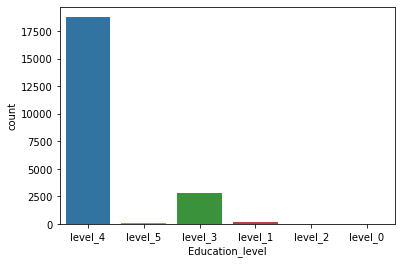

In [135]:
sns.countplot(x='Education_level',data=df)
df['Education_level']= df['Education_level'].fillna(df['Education_level'].mode().iloc[0])

In [137]:
df.isnull().sum()

job_level                                  0
job_duration_in_current_job_level          0
person_level                               0
job_duration_in_current_person_level       0
job_duration_in_current_branch             0
Employee_type                              0
Employee_status                            0
gender                                     0
age                                        0
marital_status_maried(Y/N)                 0
number_of_dependences                      0
Education_level                            0
GPA                                     3501
year_graduated                          3501
job_duration_as_permanent_worker        2030
job_duration_from_training                 0
branch_rotation                            0
job_rotation                               0
assign_of_otherposition                    0
annual leave                               0
sick_leaves                                0
Best Performance                           0
Avg_achiev

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21870 entries, 0 to 22004
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   job_level                             21870 non-null  object 
 1   job_duration_in_current_job_level     21870 non-null  float64
 2   person_level                          21870 non-null  object 
 3   job_duration_in_current_person_level  21870 non-null  float64
 4   job_duration_in_current_branch        21870 non-null  float64
 5   Employee_type                         21870 non-null  object 
 6   Employee_status                       21870 non-null  object 
 7   gender                                21870 non-null  object 
 8   age                                   21870 non-null  int64  
 9   marital_status_maried(Y/N)            21870 non-null  object 
 10  number_of_dependences                 21870 non-null  int64  
 11  Education_level

<AxesSubplot:xlabel='year_graduated', ylabel='count'>

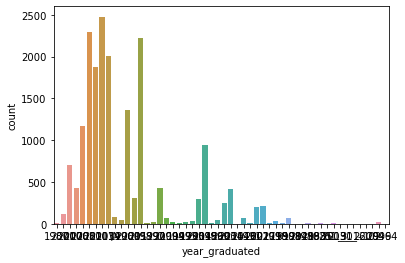

In [122]:
sns.countplot(x='year_graduated',data=df)

In [38]:
#last achievement dengan avg achievement
#pake MICE
obj_columns = df.select_dtypes(['object']).columns
df[obj_columns] = df[obj_columns].astype('category')
#merubah category menjadi int column
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x:x.cat.codes)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data = df.values
ix = [i for i in range(data.shape[1]) if i != 27]
X, y = data[:, ix], data[:, 27]
print('Missing: %d' % sum(np.isnan(X).flatten()))
imputer = IterativeImputer()
Xtrans = imputer.fit_transform(X)
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 24057
Missing: 0


AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

<AxesSubplot:xlabel='job_duration_as_permanent_worker'>

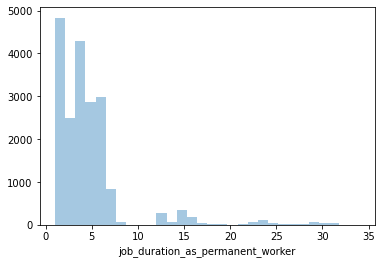

In [15]:
#Pake mice
sns.distplot(df['job_duration_as_permanent_worker'],kde=False,bins=30)

<AxesSubplot:xlabel='Best Performance', ylabel='count'>

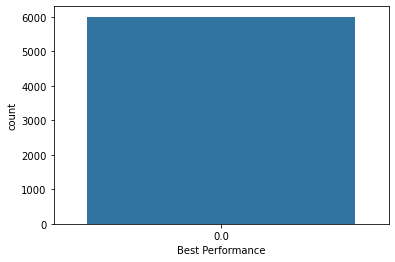

In [42]:
df_test=pd.read_csv('submission_ketiga.csv')
sns.countplot(x='Best Performance',data=df_test)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df= pd.read_csv('test.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              6000 non-null   object 
 1   job_duration_in_current_job_level      6000 non-null   float64
 2   person_level                           6000 non-null   object 
 3   job_duration_in_current_person_level   6000 non-null   float64
 4   job_duration_in_current_branch         6000 non-null   float64
 5   Employee_type                          6000 non-null   object 
 6   Employee_status                        6000 non-null   object 
 7   gender                                 6000 non-null   object 
 8   age                                    6000 non-null   int64  
 9   marital_status_maried(Y/N)             6000 non-null   object 
 10  number_of_dependences                  6000 non-null   int64  
 11  numb

In [42]:
#kalau gk di drop, kita perlu merubah satu-satu
#ganti yang selain year_graduatednya 1982 - 2019 dengan most frequent whic is 2011
df['year_graduated'].mode().iloc[0]
sorted(df['year_graduated'].unique())

['.',
 '0',
 '1016',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '207',
 '209',
 '2201',
 '2999',
 '3.05',
 '3.18',
 '3013',
 '9999',
 '\\N']

<AxesSubplot:xlabel='year_graduated', ylabel='count'>

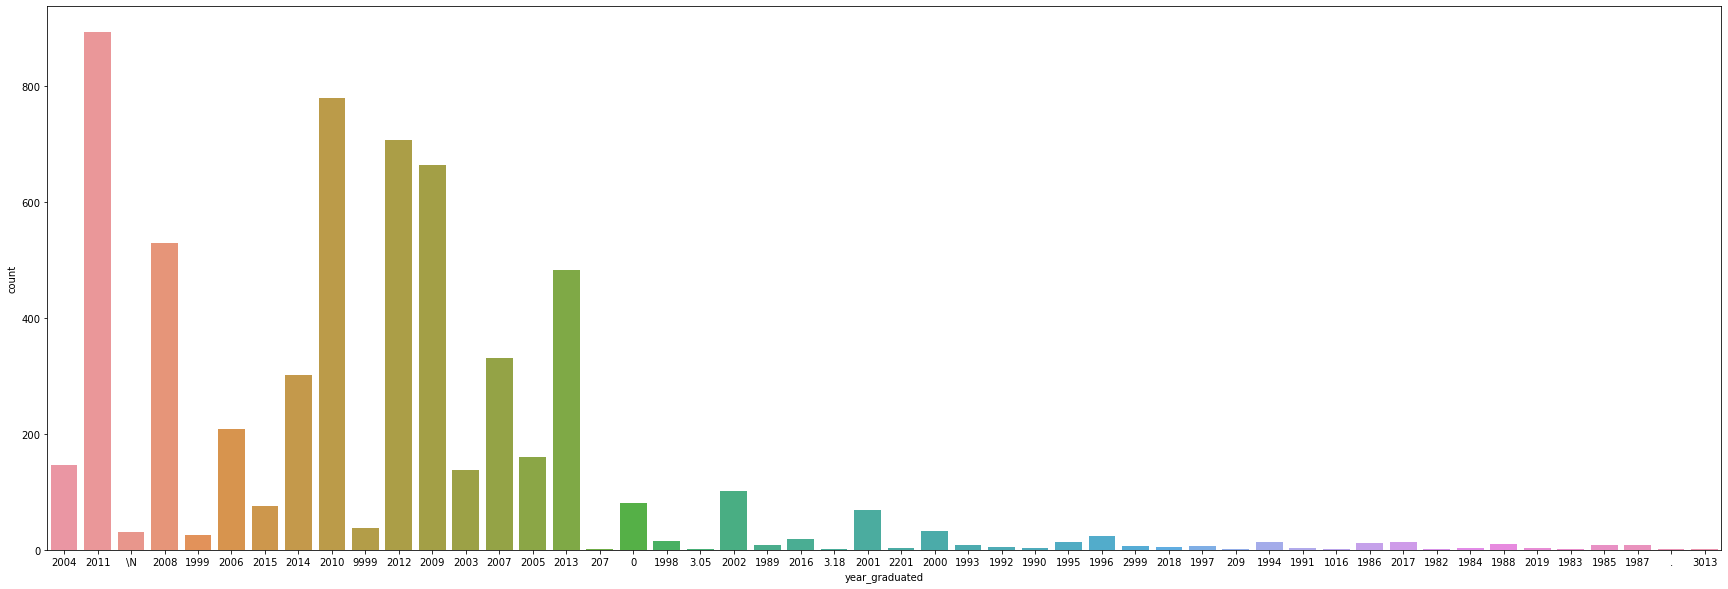

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(df['year_graduated'])